In [1]:
import numpy as np
import lightcones
import math
import lightcones as lc
import lightcones.linalg as la
import matplotlib.pyplot as plt
from lightcones.linalg import mv
from lightcones import models
from lightcones.solvers.schrodinger import solve
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

n_sites = 101
e = 2
h = 0.5
es = [e]*n_sites
hs = [h]*(n_sites-1)
n_i=10

–î–ª—è —á–∞—Å—Ç–∏—Ü—ã –ª–æ–∫–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–æ–π —É–∑–ª–µ $n_i$ –ø–æ—Å—á–∏—Ç–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é –í–∏–≥–Ω–µ—Ä–∞
$$\rho = \ket{n_i}\bra{n_i}$$
$$
	W(m,k)= \sum_{n=-\infty}^{n=+\infty} \frac{1}{2 \pi} \bra{n}\ket{n_i}\bra{n_i}\ket{m-n} e^{-ik(2n-m)} =\delta_{m, 2n_i}
$$

In [27]:
#–î–ª—è —á–∞—Å—Ç–∏—Ü—ã –Ω–∞ —É–∑–ª–µ n_i
def wigner(n_sites, k,e,h):
    
    nk = len(k)
    ns=n_sites
    rho_w = np.zeros((ns, ns), dtype=complex)
    rho_w[n_i, n_i] = 1.0
 # |n_i><n_i|

    #for i in range(ns):
        #for j in range(2*ns):
            #if j == i:
                #rho_w[i, j] = e
            #elif j == i - 1 or j == i + 1:
                #rho_w[i, j] = h
            #else:
                #rho_w[i, j] = 0

    w_ = np.zeros((nk, 2*ns), dtype = complex)

    for m in range(2*ns):
        for n in range(ns):
            n1 = n
            n2 = m - n
            if 0 <= n2 < ns:
                for p, k_val in enumerate(k):
                    w_[p, m] += rho_w[n1, n2] * np.exp(-1j * k_val * (2*n - m))
    w_ /= (2 * np.pi)
    return w_


In [28]:
k = np.arange(0, math.pi, 0.01)
w_p = wigner(n_sites, k,e,h)

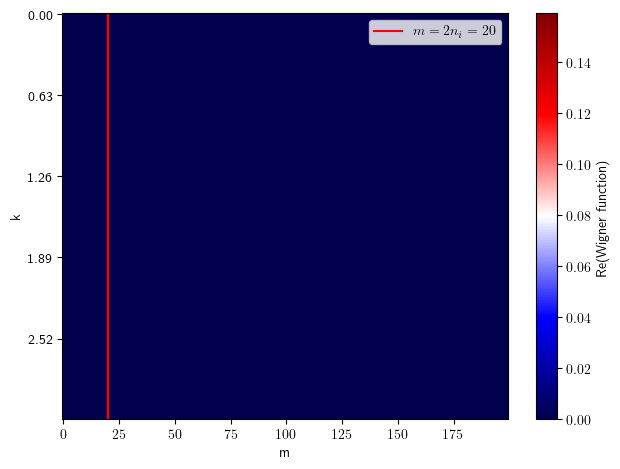

In [ ]:
max_ = np.max(np.abs(w_p[:]))
min_ = -max_

im = plt.imshow(w_p[:, :2*n_sites].real, aspect='auto', cmap='seismic', vmin=min_, vmax=max_)

plt.xlabel('m')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)
plt.axvline(x=2*n_i, color='red', linestyle='-', label=f'$m = 2n_i = {2*n_i}$')
plt.legend()
# üé® –î–æ–±–∞–≤–ª—è–µ–º colorbar
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')

plt.tight_layout()
plt.show()
#plt.savefig('pictures/memory_t0.eps', format='eps')

–í—ã—Ö–æ–¥–∏—Ç –¥–µ–ª—å—Ç–∞ —Ñ—É–Ω–∫—Ü–∏—è, –Ω–æ –Ω–µ –Ω–∞ —É–∑–ª–µ $n_i$, –∞ –Ω–∞ —É–∑–ª–µ $2n_i$.

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏–º –¥–ª—è –ø–ª–æ—Å–∫–æ–π –≤–æ–ª–Ω—ã —Å –∏–º–ø—É–ª—å—Å–æ–º $q$:
\begin{equation}
	\ket{\psi} = \ket{q} = \sum_{n=-\infty}^{n=+\infty} e^{i n q }\ket{n}
\end{equation}
–í—Å–ø–æ–º–Ω–∏–º —Ä–∞–≤–µ–Ω—Å—Ç–≤–æ: 
\begin{equation}
	\sum_{k=-\infty}^{k=+\infty} e^{2 \pi i k t } = \sum_{n=-\infty}^{n=+\infty} \delta (n-t)
\end{equation}
$$
	\hat{ \rho } =  \sum_n \sum_m	e^{i q (n-m)}\ket{n}\bra{m}\\
	\bra{n'} \hat{\rho} \ket{m'-n'} =  \sum_n \sum_m	e^{i q (n-m)}\delta_{n,n'}\delta_{m,m'-n'}=\\
	= \sum_m e^{i q (n-m)} \delta_{m'-m,n'} = e^{i q (2n'-m')} \\
	W(m',k) = \sum_{n'} e^{-i k (2 n' - m ')} e^{i q (2n' - m')} = e^{- i m' (q-k)} \sum_{n'} e^{i 2 n'(q-k)} =  e^{- i m' (q-k) }\sum_{r} \delta(r-\frac{q-k}{\pi}) 
$$

In [33]:
def wigner(n_sites, k, q):
    nk = len(k)
    ns = n_sites
    rho = np.zeros((ns, ns), dtype=complex)

    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã |q><q|
    for n in range(ns):
        for m in range(ns):
            rho[n, m] = np.exp(1j * q * (n - m))

    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –í–∏–≥–Ω–µ—Ä–∞
    w_ = np.zeros((nk, 2*ns), dtype=complex)
    for m in range(2*ns):
        for n in range(ns):
            n1 = n
            n2 = m - n
            if 0 <= n2 < ns:
                for p, k_val in enumerate(k):
                    w_[p, m] += rho[n1, n2] * np.exp(-1j * k_val * (2*n - m))
    w_ /= (2 * np.pi)
    return w_

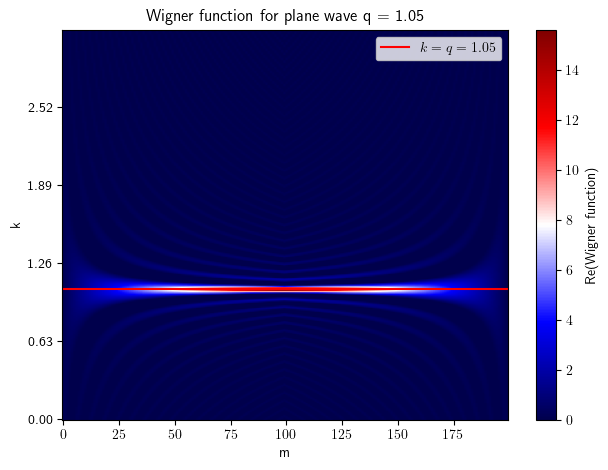

In [ ]:
q = np.pi / 3  # –∏–º–ø—É–ª—å—Å –ø–ª–æ—Å–∫–æ–π –≤–æ–ª–Ω—ã
k = np.linspace(0, np.pi, 300)

w_p = wigner(n_sites, k, q)

max_ = np.max(np.abs(w_p[:]))
min_ = -max_

im = plt.imshow(w_p[:, :2*n_sites].real, aspect='auto', cmap='seismic', vmin=min_, vmax=max_,origin="lower")
plt.xlabel('m')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)
# –ù–∞–π–¥—ë–º –∏–Ω–¥–µ–∫—Å, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π k = q
k_index = np.argmin(np.abs(k - q))  # –∏–ª–∏ q = np.pi / 3

plt.axhline(y=k_index, color='red', linestyle='-', label=f'$k = q = {q:.2f}$')
plt.legend()
# üé® –î–æ–±–∞–≤–ª—è–µ–º colorbar
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')
plt.title(f'Wigner function for plane wave q = {q:.2f}')
plt.tight_layout()
plt.show()
#plt.savefig('pictures/memory_t0.eps', format='eps')

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –æ–¥–Ω–æ—á–∞—Å—Ç–∏—á–Ω—ã–π –≥–∞–º–∏–ª—å—Ç–æ–Ω–∏–∞–Ω –Ω–∞ —Ü–µ–ø–æ—á–∫–µ
\begin{equation}
H_{n,m} \;=\; e\,\delta_{n,m} \;+\; h\,(\delta_{n,m+1}+\delta_{n,m-1}),
\qquad n,m\in\{0,1,2,\dots\}.
\end{equation}

\begin{equation}
W_H(m,k) \;=\; \frac{1}{2\pi}\sum_{n} e^{-ik(2n-m)}\,H_{n,\,m-n}.
\end{equation}



–ü–æ–¥—Å—Ç–∞–Ω–æ–≤–∫–∞ –¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω–æ–π —á–∞—Å—Ç–∏ –¥–∞—ë—Ç
\begin{equation}
H_{n,m-n}^{(\text{diag})}=e\,\delta_{n,m-n}
\quad\Rightarrow\quad n=\frac{m}{2}.
\end{equation}
–≠—Ç–æ –≤–æ–∑–º–æ–∂–Ω–æ —Ç–æ–ª—å–∫–æ –ø—Ä–∏ —á—ë—Ç–Ω—ã—Ö $m$ –∏ –¥–∞—ë—Ç
\begin{equation}
W_{\text{diag}}(m,k)=
\begin{cases}
\dfrac{e}{2\pi}, & m \text{ —á—ë—Ç–Ω–æ–µ},\\[6pt]
0, & m \text{ –Ω–µ—á—ë—Ç–Ω–æ–µ}.
\end{cases}
\end{equation}



\begin{equation}
H_{n,m-n}^{(\text{hop})}=h\,\delta_{n,\,m-n+1}+h\,\delta_{n,\,m-n-1}.
\end{equation}
–ü–µ—Ä–≤–æ–µ —É—Å–ª–æ–≤–∏–µ –¥–∞—ë—Ç $2n=m+1\Rightarrow n=\frac{m+1}{2}$ –∏ $2n-m=1$,
–≤—Ç–æ—Ä–æ–µ $2n=m-1\Rightarrow n=\frac{m-1}{2}$ –∏ $2n-m=-1$.
–û–±–∞ —Å—É—â–µ—Å—Ç–≤—É—é—Ç —Ç–æ–ª—å–∫–æ –ø—Ä–∏ –Ω–µ—á—ë—Ç–Ω—ã—Ö $m$, —Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ
\begin{equation}
W_{\text{hop}}(m,k)=
\begin{cases}
\dfrac{h}{\pi}\,\cos k, & m \text{ –Ω–µ—á—ë—Ç–Ω–æ–µ},\\[6pt]
0, & m \text{ —á—ë—Ç–Ω–æ–µ}.
\end{cases}
\end{equation}


–î–ª—è –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ–π —Ü–µ–ø–æ—á–∫–∏:
\begin{equation}
W_H(m,k)=
\begin{cases}
\dfrac{e}{2\pi}, & m \text{ —á—ë—Ç–Ω–æ–µ},\\[6pt]
\dfrac{h}{\pi}\cos k, & m \text{ –Ω–µ—á—ë—Ç–Ω–æ–µ},\\[6pt]
0, & \text{–∏–Ω–∞—á–µ}.
\end{cases}
\end{equation}

–î–ª—è —Ç—Ä—ë—Ö–¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω–æ–≥–æ –≥–∞–º–µ–ª—å—Ç–æ–Ω–∏–∞–Ω–∞ –ø–æ—Å—Ç—Ä–æ–∏–º $H_w$

In [62]:
def wigner(n_sites, k,e,h):
    
    nk = len(k)
    ns=n_sites
    
    """"
     –ú–∞—Ç—Ä–∏—Ü–∞ –≥–∞–º–∏–ª—å—Ç–æ–Ω–∏–∞–Ω–∞ –¥–ª—è –ø–æ–ª—É–±–µ—Å–∫–æ–Ω–µ—á–Ω–æ–π —Ü–µ–ø–æ—á–∫–∏,
    —É—Å–µ—á—ë–Ω–Ω–æ–π –¥–æ —É–∑–ª–æ–≤ 0..N (—Ä–∞–∑–º–µ—Ä (N+1)x(N+1)).
    """
    H = np.zeros((ns, ns), dtype=complex)
    # –î–∏–∞–≥–æ–Ω–∞–ª—å
    np.fill_diagonal(H, e)
    # –°–≤—è–∑–∏ –º–µ–∂–¥—É —Å–æ—Å–µ–¥—è–º–∏
    for n in range(ns-1):
        H[n, n+1] = h
        H[n+1, n] = h


    w_ = np.zeros((nk, 2*ns), dtype = complex)

    for m in range(2*ns):
        for n in range(ns):
            n1 = n
            n2 = m - n
            if 0 <= n2 < ns:
                for p, k_val in enumerate(k):
                    w_[p, m] += H[n1, n2] * np.exp(-1j * k_val * (2*n - m))
    w_ /= (2 * np.pi)
    return w_

In [63]:
k = np.arange(0, math.pi, 0.01)
w_p = wigner(n_sites, k,e,h)

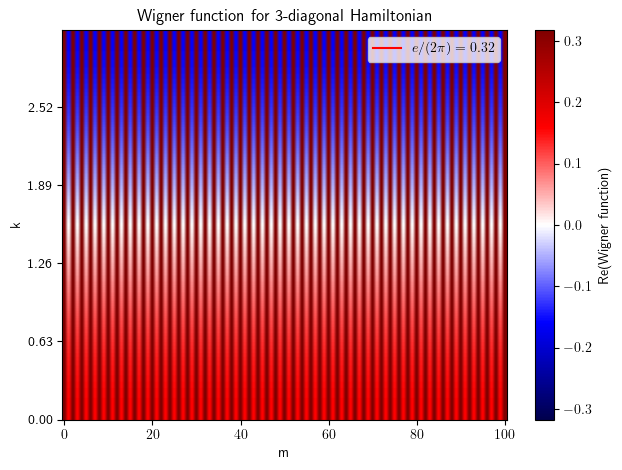

In [70]:
max_ = np.max(np.abs(w_p[:]))
min_ = -max_

im = plt.imshow(w_p[:, :n_sites].real, aspect='auto', cmap='seismic', vmin=min_, vmax=max_,origin="lower")
plt.plot([], [], color='red', linestyle='-', label=f'$ e/(2\\pi)= {e/(2*np.pi):.2f}$')
plt.legend()
plt.xlabel('m')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)
plt.title('Wigner function for 3-diagonal Hamiltonian')
# üé® –î–æ–±–∞–≤–ª—è–µ–º colorbar
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')

plt.tight_layout()
plt.show()
#plt.savefig('pictures/memory_t0.eps', format='eps')

–ü–æ—Å—Ç—Ä–æ–∏–º —Ñ.–í–∏–≥–Ω–µ—Ä–∞ –æ—Ç –ì–∞–º–µ–ª—å—Ç–æ–Ω–∏–∞–Ω–∞ –Ω–µ–º–Ω–æ–≥–æ –∏–Ω–∞—á–µ, –∫–∞–∫ —Ç—É—Ç https://arxiv.org/pdf/hep-lat/0010002
–†–∞–±–æ—Ç–∞–µ—Ç —Ç–æ–ª—å–∫–æ –¥–ª—è $N_{site} = odd$.
\begin{equation}
	H_w(m,k) = \frac{1}{2s+1}\sum_{h=-s}^{s} e^{(i \frac{4 \pi}{2s+1} h k)}\bra{m-h} \hat{H} \ket{m+h}
\end{equation}

In [40]:
def build_hamiltonian(n_sites, e, h):
    """
    –¢—Ä—ë—Ö–¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω—ã–π –≥–∞–º–∏–ª—å—Ç–æ–Ω–∏–∞–Ω –¥–ª—è —Ü–µ–ø–æ—á–∫–∏ –∏–∑ n_sites —É–∑–ª–æ–≤.
    –î–∏–∞–≥–æ–Ω–∞–ª—å = e, —Å–æ—Å–µ–¥–Ω–∏–µ —Å–≤—è–∑–∏ = h.
    """
    H = np.zeros((n_sites, n_sites), dtype=complex)
    # –î–∏–∞–≥–æ–Ω–∞–ª—å
    np.fill_diagonal(H, e)
    # –°–æ—Å–µ–¥–Ω–∏–µ —Å–≤—è–∑–∏
    for n in range(n_sites - 1):
        H[n, n+1] = h
        H[n+1, n] = h
    return H

In [41]:
print(build_hamiltonian(n_sites, e, h))

[[2. +0.j 0.5+0.j 0. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 2. +0.j 0.5+0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 2. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 ...
 [0. +0.j 0. +0.j 0. +0.j ... 2. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0.5+0.j 2. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 0.5+0.j 2. +0.j]]


In [42]:
def wigner_discrete(H, k_vals):
    """
    –î–∏—Å–∫—Ä–µ—Ç–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –í–∏–≥–Ω–µ—Ä–∞ –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
    H_w(m,k) = (1/(2s+1)) * sum_{h=-s}^s exp(i * 4œÄ/(2s+1) * h * k) * <m-h|H|m+h>
    
    Parameters
    ----------
    H : np.ndarray
        –ì–∞–º–∏–ª—å—Ç–æ–Ω–∏–∞–Ω (ns x ns)
    k_vals : array_like
        –°–µ—Ç–∫–∞ –ø–æ k (–Ω–∞–ø—Ä–∏–º–µ—Ä, np.arange(ns))
    
    Returns
    -------
    H_w : np.ndarray
        –ú–∞—Å—Å–∏–≤ —Ñ–æ—Ä–º—ã (len(k_vals), ns)
    """
    ns = H.shape[0]
    s = (ns - 1) // 2   # –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º –Ω–µ—á—ë—Ç–Ω–æ–µ —á–∏—Å–ª–æ —É–∑–ª–æ–≤
    nk = len(k_vals)
    
    H_w = np.zeros((nk, ns), dtype=complex)
    
    for m in range(ns):
        for h in range(-s, s+1):
            m_minus = m - h
            m_plus  = m + h
            if 0 <= m_minus < ns and 0 <= m_plus < ns:
                phase = np.exp(1j * (4*np.pi/(2*s+1)) * h * k_vals)
                H_w[:, m] += H[m_minus, m_plus] * phase
        H_w[:, m] /= (2*s+1)
    
    return H_w

In [43]:
k = np.arange(0, math.pi, 0.01)

# –°—Ç—Ä–æ–∏–º –≥–∞–º–∏–ª—å—Ç–æ–Ω–∏–∞–Ω
H = build_hamiltonian(n_sites, e, h)

# –°—á–∏—Ç–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é –í–∏–≥–Ω–µ—Ä–∞
w_p = wigner_discrete(H, k)

print("H shape:", H.shape)
print("H_w shape:", w_p.shape)
print(np.array2string(w_p.real, precision=3, suppress_small=True))

H shape: (100, 100)
H_w shape: (315, 100)
[[0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]]


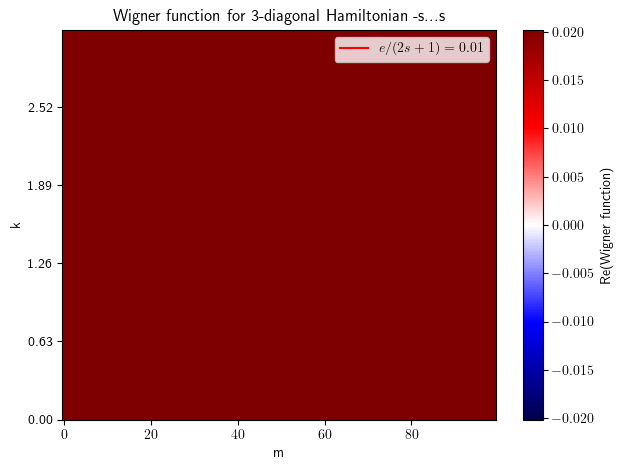

In [44]:
max_ = np.max(np.abs(w_p))
min_ = -max_

im = plt.imshow(w_p[:, :n_sites].real, aspect='auto', cmap='seismic', vmin=min_, vmax=max_,origin="lower")
plt.plot([], [], color='red', linestyle='-', label=f'$ e/(2s+1)= {e/(2*n_sites+1):.2f}$')
plt.legend()
plt.xlabel('m')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)
plt.title('Wigner function for 3-diagonal Hamiltonian -s...s')
# üé® –î–æ–±–∞–≤–ª—è–µ–º colorbar
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')


plt.tight_layout()
plt.show()
#plt.savefig('pictures/memory_t0.eps', format='eps')

In [81]:
n_sites = 100
def build_hamiltonian(n_sites, e, h):
    """
    –¢—Ä—ë—Ö–¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω—ã–π –≥–∞–º–∏–ª—å—Ç–æ–Ω–∏–∞–Ω –¥–ª—è —Ü–µ–ø–æ—á–∫–∏ –∏–∑ n_sites —É–∑–ª–æ–≤.
    –î–∏–∞–≥–æ–Ω–∞–ª—å = e, —Å–æ—Å–µ–¥–Ω–∏–µ —Å–≤—è–∑–∏ = h.
    """
    n_s = n_sites *2 
    H = np.zeros((n_s, n_s), dtype=complex)
    # –î–∏–∞–≥–æ–Ω–∞–ª—å
    for n in range(n_s//2):
        H[2*n, 2*n] = e
    # –°–æ—Å–µ–¥–Ω–∏–µ —Å–≤—è–∑–∏
    for n in range(n_s//2-1):
        H[2*n, 2*n+2] = h
        H[2*n+2, 2*n] = h
    return H
print(build_hamiltonian(n_sites, e, h))

[[2. +0.j 0. +0.j 0.5+0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 2. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 ...
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 2. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 0. +0.j 0. +0.j]]


In [82]:
def wigner_discrete(H, k_vals):
    r"""
    –î–∏—Å–∫—Ä–µ—Ç–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –í–∏–≥–Ω–µ—Ä–∞ –ø–æ —Ñ–æ—Ä–º—É–ª–µ:

        W(m,k) = (1/N) * sum_{d=-(N-1)}^{N-1}
                 exp(i * 2œÄ/N * d * k) * <m - d/2 | H | m + d/2>,

    –≥–¥–µ N = 2s+1 = —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –º–∞—Ç—Ä–∏—Ü—ã.

    Parameters
    ----------
    H : np.ndarray
        –ì–∞–º–∏–ª—å—Ç–æ–Ω–∏–∞–Ω (N x N)
    k_vals : array_like
        –°–µ—Ç–∫–∞ –ø–æ k (–Ω–∞–ø—Ä–∏–º–µ—Ä, np.arange(N))

    Returns
    -------
    W : np.ndarray
        –ú–∞—Å—Å–∏–≤ —Ñ–æ—Ä–º—ã (len(k_vals), N)
    """
    N = H.shape[0]
    theta = 2 * np.pi / N
    k_vals = np.asarray(k_vals)
    nk = k_vals.size

    W = np.zeros((nk, N), dtype=complex)

    for m in range(N):
        for d in range(-(N-1), N):
            # –∏–Ω–¥–µ–∫—Å—ã m¬±d/2 –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å —Ü–µ–ª—ã–º–∏
            if (m - d/2).is_integer() and (m + d/2).is_integer():
                i = int(m - d/2)
                j = int(m + d/2)
                if 0 <= i < N and 0 <= j < N:
                    phase = np.exp(1j * theta * d * k_vals)
                    W[:, m] += H[i, j] * phase
        W[:, m] /= N
    return W

In [83]:
k = np.arange(0, math.pi, 0.01)

# –°—Ç—Ä–æ–∏–º –≥–∞–º–∏–ª—å—Ç–æ–Ω–∏–∞–Ω
H = build_hamiltonian(n_sites, e, h)

# –°—á–∏—Ç–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é –í–∏–≥–Ω–µ—Ä–∞
w_p = wigner_discrete(H, k)

print("H shape:", H.shape)
print("H_w shape:", w_p.shape)
print(np.array2string(w_p.real, precision=3, suppress_small=True))

H shape: (200, 200)
H_w shape: (315, 200)
[[0.01  0.005 0.01  ... 0.005 0.01  0.   ]
 [0.01  0.005 0.01  ... 0.005 0.01  0.   ]
 [0.01  0.005 0.01  ... 0.005 0.01  0.   ]
 ...
 [0.01  0.005 0.01  ... 0.005 0.01  0.   ]
 [0.01  0.005 0.01  ... 0.005 0.01  0.   ]
 [0.01  0.005 0.01  ... 0.005 0.01  0.   ]]


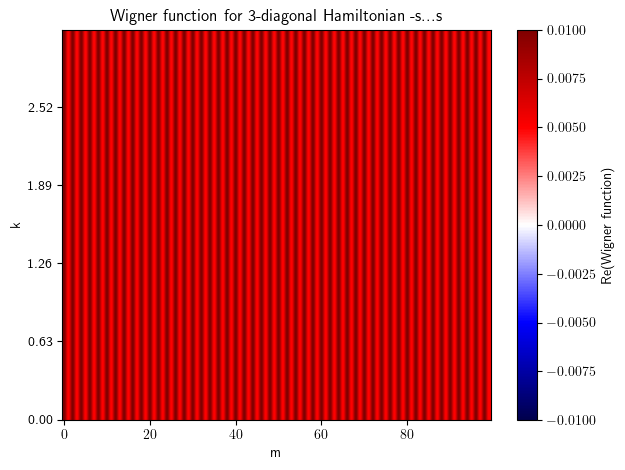

In [84]:
max_ = np.max(np.abs(w_p))
min_ = -max_

im = plt.imshow(w_p[:, :n_sites].real, aspect='auto', cmap='seismic', vmin=min_, vmax=max_,origin="lower")
#plt.plot([], [], color='red', linestyle='-', label=f'$ e/(2s+1)= {e/(2*n_sites+1):.2f}$')
#plt.legend()
plt.xlabel('m')
plt.ylabel('k')

plt.yticks(
    [len(k)/5 * i for i in range(5)],
    labels=["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)]
)
plt.title('Wigner function for 3-diagonal Hamiltonian -s...s')
# üé® –î–æ–±–∞–≤–ª—è–µ–º colorbar
cbar = plt.colorbar(im)
cbar.set_label('Re(Wigner function)')


plt.tight_layout()
plt.show()
#plt.savefig('pictures/memory_t0.eps', format='eps')